# Checking Downloaded Data - nc file

In [1]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
import numpy as np

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [14]:
# Set directory
folder = Path('/mnt/c/Users/C0060017/Documents/Taught_Material/MRes_Dissertation/Dissertation/MRes_dataset/active_data/102_prcp')
# uncomment below to check if it is the right path
!ls {folder}

era5_copernicus_xclimSeasonR99ptot_QSDEC_prcp_2001-2019.nc
era5_copernicus_xclimSeason_QSDEC_prcp_2001-2019.nc
era5_copernicus_xclimSeason_QSDEC_prcp_RegridedToIMERG_2001-2019.nc
gpm_imerg_xclimSeasonR99ptot_QSDEC_prcp_2001-2019.nc
gpm_imerg_xclimSeasonR99ptot_QSDEC_prcp_RegridToERA5_2001-2019.nc
gpm_imerg_xclimSeason_QSDEC_prcp_2001-2019.nc
gpm_imerg_xclimSeason_QSDEC_prcp_RegridToERA5_2001-2019.nc
hadukWGS84Attr_metoffice_xclimSeasonR99ptot_QSDEC_prcp_2001-2019.nc
hadukWGS84Attr_metoffice_xclimSeasonR99ptot_QSDEC_prcp_RegridToERA5_2001-2019.nc
hadukWGS84Attr_metoffice_xclimSeason_QSDEC_prcp_2001-2019.nc
hadukWGS84Attr_metoffice_xclimSeason_QSDEC_prcp_RegridToERA5_2001-2019.nc
hadukWGS84Attr_metoffice_xclimSeason_QSDEC_prcp_RegridedToIMERG_2001-2019.nc
hadukWGS84_metoffice_xclimSeasonR99ptot_QSDEC_prcp_2001-2019.nc
hadukWGS84_metoffice_xclimSeason_QSDEC_prcp_2001-2019.nc
haduk_metoffice_xclimSeasonR99ptot_QSDEC_prcp_2001-2019.nc
haduk_metoffice_xclimSeason_QSDEC_prcp_2001-2019.nc


In [15]:
# Reading the data
dataset = xr.open_dataset(Path(folder / 'era5_copernicus_xclimSeason_QSDEC_prcp_RegridedToIMERG_2001-2019.nc'), decode_timedelta=False)
dataset
# print(dataset['prcptot'])
# np.count_nonzero(~np.isnan(dataset['prcptot'].values))

# Save copy of nc file
# dataset.to_netcdf(Path(folder / 'hadukTest_metoffice_xclimSeason_QSDEC_prcp_2001-2019.nc'))

<xarray.Dataset>
Dimensions:      (time: 77, lon: 111, lat: 121, percentiles: 1)
Coordinates:
  * time         (time) datetime64[ns] 2000-12-01 2001-03-01 ... 2019-12-01
  * lon          (lon) float32 -9.05 -8.95 -8.85 -8.75 ... 1.65 1.75 1.85 1.95
  * lat          (lat) float32 48.95 49.05 49.15 49.25 ... 60.75 60.85 60.95
  * percentiles  (percentiles) float64 95.0
Data variables:
    r10mm        (time, lat, lon) float64 ...
    r20mm        (time, lat, lon) float64 ...
    cdd          (time, lat, lon) float64 ...
    cwd          (time, lat, lon) float64 ...
    sdii         (time, lat, lon) float64 ...
    rx1day       (time, lat, lon) float64 ...
    rx5day       (time, lat, lon) float64 ...
    prcptot      (time, lat, lon) float64 ...
    r95ptot      (time, lat, lon, percentiles) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon Jul 26 18:48:09 2021: cdo -remapcon,gpm_imerg_xclimSeas...
    frequency:    day
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [21]:
GPM_dataset_season = xr.open_dataset(Path(folder / 'gpm_imerg_xclimSeason_QSDEC_prcp_RegridToERA5_2001-2019.nc'))
HAD_dataset_season = xr.open_dataset(Path(folder / 'hadukWGS84Attr_metoffice_xclimSeason_QSDEC_prcp_RegridToERA5_2001-2019.nc'))

GPM_dataset_DJF = GPM_dataset_season.sel(time=GPM_dataset_season.time.dt.season=="DJF")
HAD_dataset_DJF = HAD_dataset_season.sel(time=HAD_dataset_season.time.dt.season=="DJF")

df_had_DJF = HAD_dataset_DJF.to_dataframe().reset_index()
HAD_groups =df_had_DJF.groupby(['latitude', 'longitude']).agg(lambda x: list(x)).reset_index()
filterGroups = HAD_groups[(HAD_groups['latitude'] == 60.75) & (HAD_groups['longitude'] == -1.25) ]
filterGroups
x = np.array(filterGroups.iat[0,4])
print(len(x))

df_had_DJF = GPM_dataset_DJF.to_dataframe().reset_index()
GPM_groups =df_had_DJF.groupby(['latitude', 'longitude']).agg(lambda x: list(x)).reset_index()
filterGroupsGPM = GPM_groups[(GPM_groups['latitude'] == 60.75) & (GPM_groups['longitude'] == -1.25) ]
filterGroupsGPM
y = np.array(filterGroupsGPM.iat[0,4])
print(len(y))

20
20


In [11]:
# Reading the data
dataset = xr.open_dataset(Path(folder / 'era5_copernicus_xclimSeason_QSDEC_prcp_2001-2019.nc'), decode_timedelta=False)
dataset

<xarray.Dataset>
Dimensions:      (latitude: 49, longitude: 45, percentiles: 1, time: 77)
Coordinates:
  * percentiles  (percentiles) int64 95
  * time         (time) datetime64[ns] 2000-12-01 2001-03-01 ... 2019-12-01
  * longitude    (longitude) float32 -9.0 -8.75 -8.5 -8.25 ... 1.25 1.5 1.75 2.0
  * latitude     (latitude) float32 61.0 60.75 60.5 60.25 ... 49.5 49.25 49.0
Data variables:
    r10mm        (time, latitude, longitude) float64 ...
    r20mm        (time, latitude, longitude) float64 ...
    cdd          (time, latitude, longitude) float64 ...
    cwd          (time, latitude, longitude) float64 ...
    sdii         (time, latitude, longitude) float64 ...
    rx1day       (time, latitude, longitude) float64 ...
    rx5day       (time, latitude, longitude) float64 ...
    prcptot      (time, latitude, longitude) float64 ...
    r95ptot      (time, latitude, longitude, percentiles) float64 ...
    r99ptot      (time, latitude, longitude, percentiles) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 13 13:37:19 2021: ncatted -O -a standard_name,tp,c,...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...

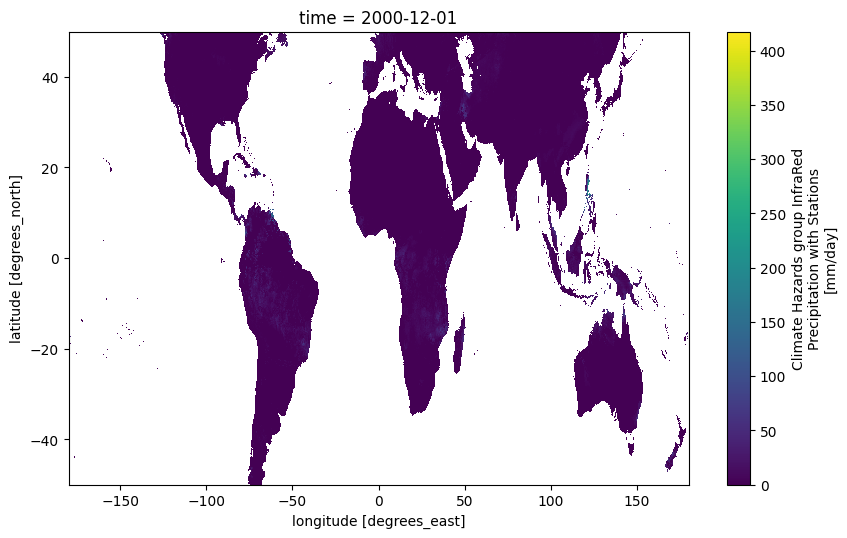

In [10]:
# Plotting
dataset['precip'].sel(time='2000-12-01').plot(x='longitude', y='latitude')

## Example of saving a nc file defining the encoding

In [ ]:
'''
Encoding Example compliant with netcdf files

encoding = {'lat': {'zlib': False},
            'lon': {'zlib': False},
            'any_variable': {'_FillValue': -999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True}
            }
'''

# Saving reprojected file
# encoding = {'y': {'zlib': False, '_FillValue': False},
#             'x': {'zlib': False, '_FillValue': False}
#             }

encoding = {'latitude': {'zlib': False},
            'longitude': {'zlib': False},
            'r10mm': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'r20mm': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'cdd': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'cwd': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'sdii': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'rx1day': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'rx5day': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'prcptot': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'r95ptot': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True},
            'r99ptot': {
                  '_FillValue': -99999.0,
                  'chunksizes': (1, 8, 10),
                  'complevel': 1,
                  'zlib': True}
            }
WGS84_file = Path(folder / 'hadukWGS84_v2_metoffice_xclimSeason_QSDEC_prcp_2001-2019.nc')
print ('saving to ', WGS84_file)
dataset_hadukWGS84_LatLon.to_netcdf(WGS84_file)
print ('finished saving')